In [596]:
import pandas as pd
import numpy as np
import pylab
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

Let's generate some data of the form

$z_t = 0.6 * 1.2 + 0.25z_{t - 1} + 0.15z_{t - 2} + 0.4\epsilon_{t - 1} + 0.3\epsilon_{t - 2} + \epsilon_t$

In [574]:
sigma = 1
date_index = pd.date_range(start='9/1/2019', end='9/1/2020')
difference_errors = np.random.normal(0, sigma, len(date_index) - 1)

In [575]:
mu = 1.2
z0 = mu + errors[0]
z1 = mu + errors[1]

differences = [z0, z1]
for t in range(2, len(difference_errors)):
    ar_term = 0.25 * (differences[t - 1] - mu) + 0.15 * (differences[t - 2] - mu)
    ma_term = 0.4 * difference_errors[t - 1] + 0.3 * difference_errors[t - 2]
    
    differences.append(mu + ar_term + ma_term + difference_errors[t])

In [576]:
pylab.mean(differences)

1.025949879414246

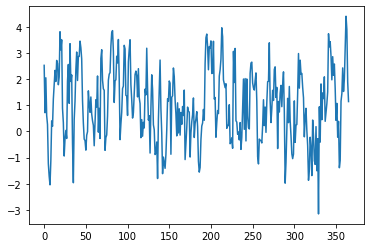

In [577]:
pylab.plot(differences)

In [578]:
v0 = mu + np.random.normal(0, sigma)
values = [v0] + list(v0 + np.cumsum(differences))
values = pd.Series(values, index=date_index)
values

2019-09-01      0.722489
2019-09-02      3.249622
2019-09-03      3.965041
2019-09-04      6.015852
2019-09-05      6.626973
                 ...    
2020-08-28    364.886964
2020-08-29    369.291474
2020-08-30    373.190453
2020-08-31    375.078041
2020-09-01    376.220145
Freq: D, Length: 367, dtype: float64

<AxesSubplot:>

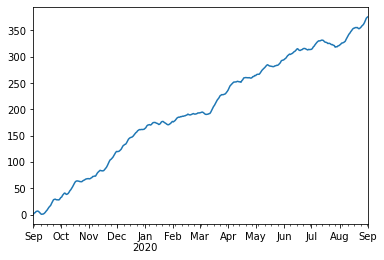

In [579]:
values.plot()

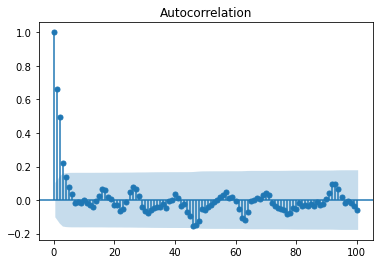

In [580]:
acf_plot = plot_acf(differences, lags=100)

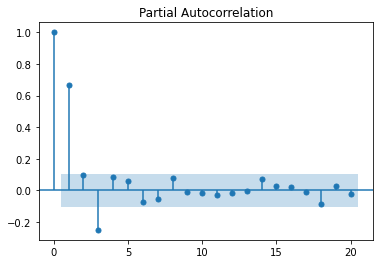

In [581]:
pacf_plot = plot_pacf(differences, lags=20)

In [582]:
train_end = datetime(2020, 8, 1)
test_end = datetime(2020, 9, 1)

train_data = values[:train_end]
test_data = values[train_end + timedelta(days=1):test_end]

In [583]:
#create the model
model = ARIMA(train_data, order=(2, 1, 2))

In [584]:
#fit the model
model_fit = model.fit()

In [585]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -484.725
Date:                Wed, 13 Jan 2021   AIC                            979.451
Time:                        15:44:17   BIC                            998.522
Sample:                    09-01-2019   HQIC                           987.054
                         - 08-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.149      1.729      0.084      -0.034       0.550
ar.L2          0.3556      0.139      2.551      0.011       0.082       0.629
ma.L1          0.4428      0.149      2.962      0.0

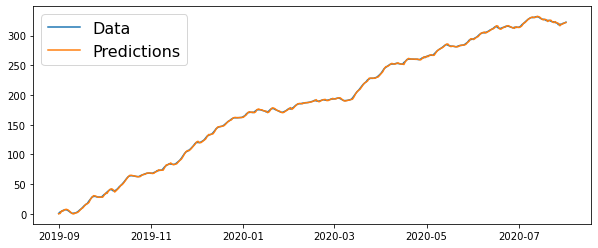

In [586]:
pylab.figure(figsize=(10,4))

pylab.plot(train_data)
pylab.plot(model_fit.predict(start=train_data.index[0], end=train_data.index[-1]))

pylab.legend(('Data', 'Predictions'), fontsize=16)

In [587]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [588]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [589]:
residuals = test_data - predictions

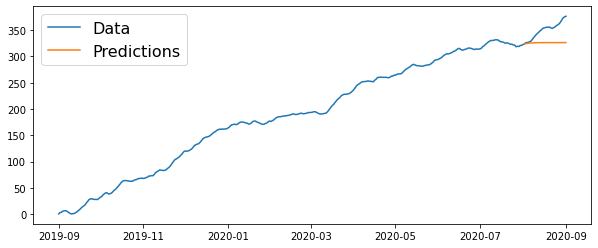

In [590]:
pylab.figure(figsize=(10,4))

pylab.plot(values)
pylab.plot(predictions)

pylab.legend(('Data', 'Predictions'), fontsize=16)

In [573]:
predictions

2020-08-02    407.442174
2020-08-03    410.091740
2020-08-04    412.200550
2020-08-05    413.931136
2020-08-06    415.330616
2020-08-07    416.470319
2020-08-08    417.395347
2020-08-09    418.147346
2020-08-10    418.758211
2020-08-11    419.254614
2020-08-12    419.657929
2020-08-13    419.985642
2020-08-14    420.251913
2020-08-15    420.468265
2020-08-16    420.644057
2020-08-17    420.786892
2020-08-18    420.902948
2020-08-19    420.997247
2020-08-20    421.073867
2020-08-21    421.136123
2020-08-22    421.186707
2020-08-23    421.227808
2020-08-24    421.261204
2020-08-25    421.288338
2020-08-26    421.310386
2020-08-27    421.328300
2020-08-28    421.342856
2020-08-29    421.354683
2020-08-30    421.364292
2020-08-31    421.372100
2020-09-01    421.378445
Freq: D, Name: predicted_mean, dtype: float64

In [490]:
test_data

2020-08-02    354.034556
2020-08-03    359.151431
2020-08-04    364.334319
2020-08-05    368.569289
2020-08-06    369.988148
2020-08-07    372.142138
2020-08-08    374.991890
2020-08-09    377.675891
2020-08-10    379.033205
2020-08-11    378.199952
2020-08-12    378.803913
2020-08-13    377.559082
2020-08-14    376.255472
2020-08-15    379.165176
2020-08-16    379.891807
2020-08-17    381.268390
2020-08-18    379.351066
2020-08-19    381.688508
2020-08-20    384.540365
2020-08-21    385.435417
2020-08-22    389.284977
2020-08-23    391.775613
2020-08-24    393.549194
2020-08-25    396.467692
2020-08-26    398.732927
2020-08-27    400.301557
2020-08-28    403.842365
2020-08-29    408.219188
2020-08-30    413.800159
2020-08-31    415.501659
2020-09-01    419.647844
Freq: D, dtype: float64